<a href="https://colab.research.google.com/github/rafabarros95/ML-DL/blob/main/LSTM_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LSTM Forecasting on Monthly Milk Production

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv(
    '/content/monthly_milk_production.csv',
    parse_dates=True, index_col='Date',

)

df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


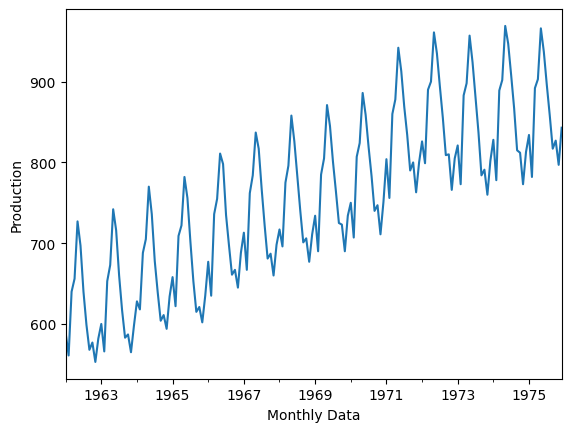

In [15]:
df['Production'].plot(xlabel='Monthly Data', ylabel='Production')
plt.show()

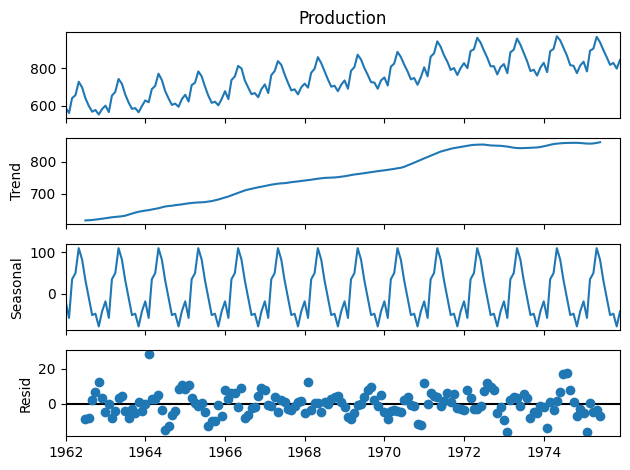

In [17]:
decomp = seasonal_decompose(df['Production'])
decomp.plot()
plt.show()


In [18]:
len(df)


168

## Train/Test Data

In [19]:
train = df.iloc[:156]
test = df.iloc[156:]

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [23]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [24]:
print(scaled_train.shape)
print(scaled_test.shape)

(156, 1)
(12, 1)


## Time Series Generator

In [26]:
!pip install tensorflow


In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [31]:
print(len(scaled_train), len(generator))

156 153


In [33]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [34]:
X.shape

(1, 3, 1)

## Same thing, but for 12 Months

In [35]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [37]:
#define model to predict
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1105
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0199
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0169
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0051
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0031
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0028
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0030
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0049
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0

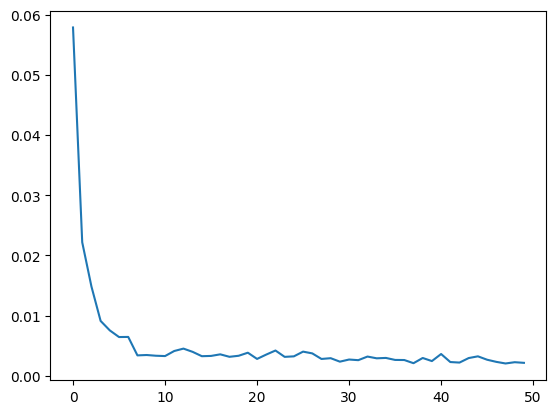

In [41]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

## Make Predictions

In [42]:
last_train_batch = scaled_train[-12:]

In [43]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [44]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


array([[0.63868123]], dtype=float32)

In [45]:
scaled_test[0]

array([0.67548077])

In [49]:
import numpy as np

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  # prediction value for 1st batch
  current_pred = model.predict(current_batch)[0]

  #append prediction to first array
  test_predictions.append(current_pred)

  #use prediction to update batch and remove the first value
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [50]:
current_batch.shape

(1, 12, 1)

In [51]:
test_predictions

[array([0.63868123], dtype=float32),
 array([0.6460181], dtype=float32),
 array([0.8254459], dtype=float32),
 array([0.9204139], dtype=float32),
 array([1.0275773], dtype=float32),
 array([1.0158733], dtype=float32),
 array([0.93898], dtype=float32),
 array([0.80884486], dtype=float32),
 array([0.6829751], dtype=float32),
 array([0.6247152], dtype=float32),
 array([0.5758396], dtype=float32),
 array([0.61355937], dtype=float32)]

## Np array to df for ploting

In [52]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

/tmp/ipython-input-52-4268826688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

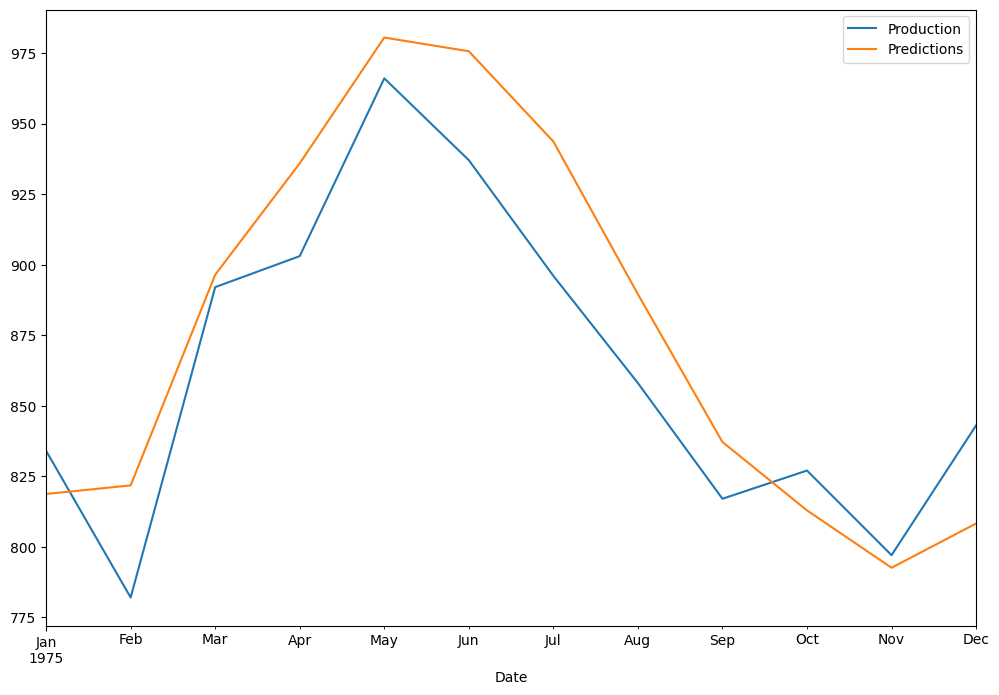

In [53]:
test.plot(figsize=(12,8))

## Model's performance and metrics measument

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from math import sqrt
reset = sqrt(mean_squared_error(test['Production'], test['Predictions']))
print(f'RMSE: {reset}')

RMSE: 28.438479855136283


## MAPE

Overall MAPE: 2.88%


/tmp/ipython-input-57-898083018.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MAPE'] = mape


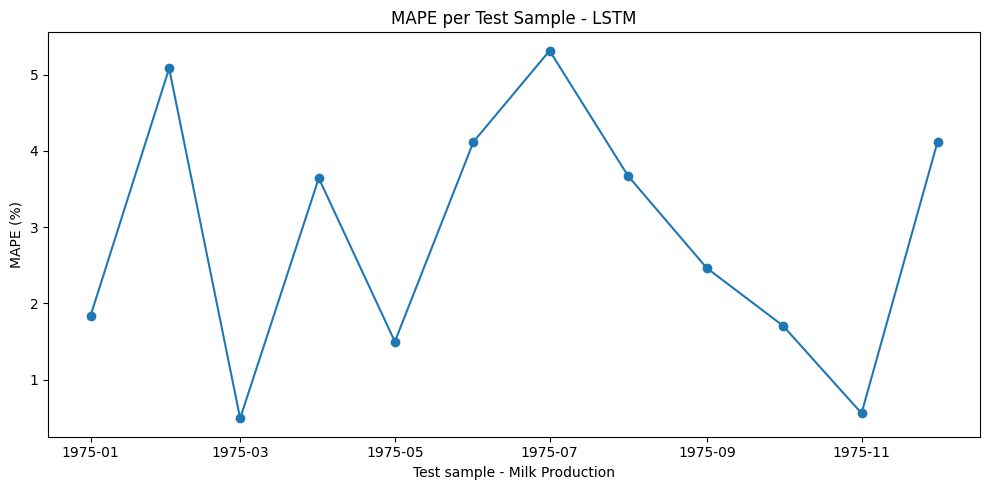

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Extract true values and predictions
y_true = test['Production'].values
y_pred = test['Predictions'].values

# 2. Compute MAPE per sample
mape = np.abs((y_true - y_pred) / y_true) * 100
test['MAPE'] = mape

# 3. Print overall MAPE
print(f"Overall MAPE: {mape.mean():.2f}%")

# 4. Plot
plt.figure(figsize=(10, 5))
plt.plot(test.index, mape, marker='o')
plt.xlabel('Test sample - Milk Production')
plt.ylabel('MAPE (%)')
plt.title('MAPE per Test Sample - LSTM')
plt.tight_layout()
plt.show()


MAPE = 2.88 (Quite Good)